In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
url = 'https://docs.google.com/spreadsheets/d/1HcdISgCl3s4RpWkJa8m-G1JjfKzd8qf2WY2Xcw32D7U/pub?gid=1371955398&single=true&output=csv'

In [3]:
def full_cast_counterpick(row):
    full_cast_events = [
#         "Best of the Rest",
#         "Bloody Sunday",
#         'Emperor Series I - Championship',
#         'Emperor Series I - Week 1',
#         'Emperor Series I - Week 2',
#         'Emperor Series I - Week 3',
#         'Emperor Series II - Championship',
#         'Emperor Series II - Week 1',
#         'Emperor Series II - Week 2',
#         'Emperor Series II - Week 3',
#         'Emperor Series III - Championship',
#         'Emperor Series III - Week 1',
#         'Emperor Series III - Week 2',
#         'Emperor Series III - Week 3',
#         'Emperor Series IV - Championship',
#         'Emperor Series IV - Week 1',
#         'Emperor Series IV - Week 2',
#         'Emperor Series IV - Week 3',
#         'Emperor Series V - Championship',
#         'Emperor Series V - Week 1',
#         'Emperor Series V - Week 2',
#         'Emperor Series V - Week 3',
#         "Fast Timer",
#         'Feature Film Festival Fight',
#         "FS.com Into Oblivion",
#         "Glimpse of the Master",
#         "Here Comes The Yomi Again",
#         "Impromptu Tournament",
#         "Intrastellar Overdrive",
        "IYL Season 1",
        "IYL Season 2",
        "IYL Season 3",
        "IYL Season 4",
        "IYL Season 5",
#         "Los Angeles Meetup 2",
#         "Mid Timer",
#         "Midori's Mentournament: The Next Generation",
#         "Monthly SE Tournament",
#         "MSS Kickoff Tournament",
#         "Not Dead Yet",
#         "Rook's Rock n' Rumble",
#         "Saturday Morning Yomi - all episodes",
#         "Something Worthwhile",
#         "Speed of Light",
#         "Super Series Saturday",
#         "Swiss Tournament",
#         "Topanda League 1",
#         "Topanda League 2",
#         "White Light White Heat",
#         "Yomi Boot Camp",
#         "Yomi Wars: A New Year",
#         "You Only Live Once",
        "NFTT Round 1",
        "NFTT Round 2",
        "NFTT Round 3",
        "NFTT Round 4",
        "NFTT Round 5",
        "NFTT Round 6",
        "NFTT Round 7",
        "NFTT Round 8",
        "Summer Smash",
        "Summer Smash II",
        "Summer Smash III",
        "Summer Smash IV",
        "Topanda League 1",
        "Topanda League 2",
    ]
    return row.event in full_cast_events

In [4]:
import pandas
import re
from enum import Enum

class Character(Enum):
   
    def __ge__(self, other):
        if self.__class__ is other.__class__:
            return self.value >= other.value
        return NotImplemented
    def __gt__(self, other):
        if self.__class__ is other.__class__:
            return self.value > other.value
        return NotImplemented
    def __le__(self, other):
        if self.__class__ is other.__class__:
            return self.value <= other.value
        return NotImplemented
    def __lt__(self, other):
        if self.__class__ is other.__class__:
            return self.value < other.value
        return NotImplemented

    Gwen = 'gwen'
    Setsuki = 'setsuki'
    Troq = 'troq'
    DeGrey = 'degrey'
    Zane = 'zane'
    Midori = 'midori'
    Grave = 'grave'
    Geiger = 'geiger'
    Menelker = 'menelker'
    Lum = 'lum'
    Quince = 'quince'
    Rook = 'rook'
    BBB = 'bbb'
    Onimaru = 'onimaru'
    Vendetta = 'vendetta'
    Jaina = 'jaina'
    Argagarg = 'argagarg'
    Valerie = 'valerie'
    Persephone = 'persephone'
    Gloria = 'gloria'
    
for char in Character:
    locals()[char.name] = char
    
historical_record = pandas.read_csv(url)
historical_record.columns = [re.sub('\W+', '_', col.lower()).strip('_') for col in historical_record.columns]

historical_record = historical_record[
    ~historical_record.character_1.isin(['Squall', 'Kefka', 'Ultimicia']) &
    ~historical_record.character_2.isin(['Squall', 'Kefka', 'Ultimicia'])
]

historical_record['match_date'] = pandas.to_datetime(historical_record.match_date, infer_datetime_format=True)
historical_record.format_restricted.replace(to_replace=['.', 'Restricted'], value=[False, True], inplace=True)
historical_record.format_team.replace(to_replace=['.', 'Team'], value=[False, True], inplace=True)
historical_record.char_select_random.replace(to_replace=['.', 'Random'], value=[False, True], inplace=True)
historical_record.char_select_locked.replace(to_replace=['.', 'Locked'], value=[False, True], inplace=True)
historical_record.set_length_non_ft3_ft4.replace(to_replace=['.', 'non-FT3/FT4'], value=[False, True], inplace=True)
historical_record.set_win_1 = historical_record.set_win_1.fillna(0)
historical_record.set_win_2 = historical_record.set_win_2.fillna(0)
historical_record.wins_1 = historical_record.wins_1.fillna(0)
historical_record.wins_2 = historical_record.wins_2.fillna(0)
historical_record['standard_format'] = historical_record.apply(full_cast_counterpick, axis=1)
historical_record.character_1 = historical_record.character_1.apply(lambda n: Character(n.lower()))
historical_record.character_2 = historical_record.character_2.apply(lambda n: Character(n.lower()))


Recurrence Relation:
  * `meta_impact(m, n) = 1 + counterpicks_2 * mu_win * meta_impact(m-1, n) + counterpicks_1 * (1 - mu_win) * meta_impact(m, n-1)`
  * `meta_impact(0, n) = 0`
  * `meta_impact(m, 0) = 0`

Counterpicks:

  * Pmn = Probability of match m/n
  * Wmn = Probability of m winning match m/n
  * Cmn = Probability of counterpicking m with n


    Paa = Waa * Caa + Wab * Caa + Wba * 0   + Wbb * 0
    Pab = Waa * Cab + Wab * Cab + Wba * 0   + Wbb * 0
    Pba = Waa * 0   + Wab * 0   + Wba * Cba + Wbb * Cba
    Pbb = Waa * 0   + Wab * 0   + Wba * Cbb + Wbb * Cbb
    [Caa, Caa, 0,   0      [Waa
     Cab, Cab, 0,   0       Wab
     0,   0,   Cba, Cba     Wba
     0,   0,   Cbb, Cbb] *  Wbb]
    
    Paa = (1-Waa) * Caa + (1-Wab) * 0   + (1-Wba) * Caa + (1-Wbb) * 0
    Pab = (1-Waa) * 0   + (1-Wab) * Cba + (1-Wba) * 0   + (1-Wbb) * Cba
    Pba = (1-Waa) * Cab + (1-Wab) * 0   + (1-Wba) * Cab + (1-Wbb) * 0
    Pbb = (1-Waa) * 0   + (1-Wab) * Cbb + (1-Wba) * 0   + (1-Wbb) * Cbb
    [Caa, 0,   Caa, 0          [Waa
     0,   Cba, 0,   Cba         Wab
     Cab, 0,   Cab, 0           Wba
     0,   Cbb, 0,   Cbb] * 1 -  Wbb]

In [5]:
def counterpicks(matches):
    matches = [row for (ix, row) in matches.iterrows()]
    for pick, counterpick in zip(matches, matches[1:] + [None]):
        if counterpick is None:
            if matches[0]['set_win_1']:
                for _ in range(int(pick['wins_1']) - 1):
                    yield (pick['character_1'], pick['character_2'])
                for _ in range(int(pick['wins_2'])):
                    yield (pick['character_2'], pick['character_1'])
            else:
                for _ in range(int(pick['wins_1'])):
                    yield (pick['character_1'], pick['character_2'])
                for _ in range(int(pick['wins_2'] - 1)):
                    yield (pick['character_2'], pick['character_1'])
                
        else:
            if pick['character_1'] != counterpick['character_1']:
                for _ in range(int(pick['wins_1'])):
                    yield (pick['character_1'], pick['character_2'])
                for _ in range(int(pick['wins_2'] - 1)):
                    yield (pick['character_2'], pick['character_1'])
                yield (pick['character_2'], counterpick['character_1'])
            else:
                for _ in range(int(pick['wins_1'] - 1)):
                    yield (pick['character_1'], pick['character_2'])
                for _ in range(int(pick['wins_2'])):
                    yield (pick['character_2'], pick['character_1'])
                yield (pick['character_1'], counterpick['character_2'])

In [6]:
from collections import namedtuple
from enum import Enum

Record = namedtuple('Record', ['type', 'event', 'match_date', 'standard_format', 'character_1', 'character_2'])

class RecordType(Enum):
    blindpick = 0
    counterpick = 1
    win = 2
    
def game_records(matches):
    first = matches.iloc[0]
    yield Record(
        RecordType.blindpick,
        first.event,
        first.match_date,
        first.standard_format,
        first.character_1,
        first.character_2,
    )
        
    for pick, counter in counterpicks(matches):
        yield Record(
            RecordType.counterpick,
            first.event,
            first.match_date,
            first.standard_format,
            pick,
            counter
        )
    
    for (ix, match) in matches.iterrows():
        for _ in range(int(match.wins_1)):
            yield Record(
                RecordType.win,
                first.event,
                first.match_date,
                first.standard_format,
                match.character_1,
                match.character_2
            )
        for _ in range(int(match.wins_2)):
            yield Record(
                RecordType.win,
                first.event,
                first.match_date,
                first.standard_format,
                match.character_2,
                match.character_1
            )
            
historical_games = pandas.DataFrame(
    game
    for key, matches in historical_record.groupby(['match_date', 'event', 'player_1', 'player_2', 'standard_format'])
    for game in game_records(matches)
)

In [7]:
historical_record.groupby(['character_1', 'character_2']).sum()[['wins_1', 'wins_2']]

wins_1  wins_2
character_1        character_2                         
Character.Argagarg Character.Argagarg      20.0     8.0
                   Character.BBB           12.0     6.0
                   Character.DeGrey        38.0    20.0
                   Character.Geiger        32.0    12.0
                   Character.Gloria        59.0    28.0
                   Character.Grave         91.0    27.0
                   Character.Gwen          35.0     9.0
                   Character.Jaina         39.0    10.0
                   Character.Lum           49.0    10.0
                   Character.Menelker      31.0     8.0
                   Character.Midori        44.0    15.0
                   Character.Onimaru       70.0    20.0
                   Character.Persephone    48.0    14.0
                   Character.Quince        28.0    13.0
                   Character.Rook          80.0    33.0
                   Character.Setsuki       46.0    24.0
                   Character.Troq          37.0    13.0
                   Character.Valerie       50.0    21.0
                   Character.Vendetta      51.0    21.0
                   Character.Zane          35.0    23.0
Character.BBB      Character.Argagarg      25.0    11.0
                   Character.BBB           26.0    10.0
                   Character.DeGrey        28.0    14.0
                   Character.Geiger        11.0     7.0
                   Character.Gloria        18.0     5.0
                   Character.Grave         28.0    19.0
                   Character.Gwen          33.0    15.0
                   Character.Jaina         17.0     6.0
                   Character.Lum           15.0    11.0
                   Character.Menelker       7.0     3.0
...                                         ...     ...
Character.Vendetta Character.Midori        24.0    11.0
                   Character.Onimaru       28.0    10.0
                   Character.Persephone    20.0     5.0
                   Character.Quince        30.0     8.0
                   Character.Rook          42.0    16.0
                   Character.Setsuki       21.0     7.0
                   Character.Troq          31.0    17.0
                   Character.Valerie       17.0    13.0
                   Character.Vendetta      11.0     4.0
                   Character.Zane          20.0     9.0
Character.Zane     Character.Argagarg      61.0    17.0
                   Character.BBB           33.0    12.0
                   Character.DeGrey       108.0    35.0
                   Character.Geiger        90.0    26.0
                   Character.Gloria        95.0    22.0
                   Character.Grave        100.0    33.0
                   Character.Gwen          40.0    12.0
                   Character.Jaina         31.0     4.0
                   Character.Lum           40.0    17.0
                   Character.Menelker      78.0    21.0
                   Character.Midori        44.0    24.0
                   Character.Onimaru       59.0    35.0
                   Character.Persephone    59.0    18.0
                   Character.Quince        47.0    17.0
                   Character.Rook          48.0    34.0
                   Character.Setsuki       88.0    29.0
                   Character.Troq          86.0    71.0
                   Character.Valerie       71.0    29.0
                   Character.Vendetta      51.0    20.0
                   Character.Zane          61.0    29.0

[400 rows x 2 columns]

In [8]:
historical_games

,type,event,match_date,standard_format,character_1,character_2
0,RecordType.blindpick,Summer Smash,2014-07-06,True,Character.Zane,Character.Rook
1,RecordType.counterpick,Summer Smash,2014-07-06,True,Character.Zane,Character.Rook
2,RecordType.counterpick,Summer Smash,2014-07-06,True,Character.Zane,Character.Rook
3,RecordType.counterpick,Summer Smash,2014-07-06,True,Character.Zane,Character.Rook
4,RecordType.win,Summer Smash,2014-07-06,True,Character.Zane,Character.Rook
5,RecordType.win,Summer Smash,2014-07-06,True,Character.Zane,Character.Rook
6,RecordType.win,Summer Smash,2014-07-06,True,Character.Zane,Character.Rook
7,RecordType.win,Summer Smash,2014-07-06,True,Character.Zane,Character.Rook
8,RecordType.blindpick,Summer Smash,2014-07-06,True,Character.Zane,Character.Onimaru
9,RecordType.counterpick,Summer Smash,2014-07-06,True,Character.Zane,Character.Onimaru


## Computational

In [9]:
# mu_win = pandas.DataFrame(
#     data=matchup_pcts.loc[cast].values,
#     #index=matchup_pcts.reset_index().apply(lambda r: (r.character_1, r.character_2), axis=1),
#     index=pandas.MultiIndex.from_product([cast, cast], names=['character_1', 'character_2']),
# ).loc[matchups]

In [10]:
import itertools
from lazy import lazy
from numpy.linalg import norm
import bootstrapped.bootstrap as bs

class Meta:
    def __init__(self, games, exclude=[]):
        self.games = games[~(games.character_1.isin(exclude) | games.character_2.isin(exclude))]
        self._meta_influence = {}
    
    @lazy
    def cast(self):
        cast = self.games.character_1.append(self.games.character_2).unique()
        cast.sort()
        return cast
    
    @lazy
    def matchups(self):
        return list(itertools.product(self.cast, self.cast))
    
    @lazy
    def matchup_index(self):
        return pandas.MultiIndex.from_product([self.cast, self.cast], names=['character_1', 'character_2'])
    
    @lazy
    def win_counts(self):
        return self.games[
            self.games.type == RecordType.win
        ].groupby(['character_1', 'character_2']).size().reindex(self.matchup_index).fillna(1)

    @lazy
    def counterpick_counts(self):
        return self.games[
            (self.games.type == RecordType.counterpick) & self.games.standard_format
        ].groupby(['character_1', 'character_2']).size().reindex(self.matchup_index).fillna(1)

    @lazy
    def blindpick_counts(self):
        blindpick_games = self.games[(self.games.type == RecordType.blindpick) & self.games.standard_format]
        return blindpick_games.character_1.append(blindpick_games.character_2).value_counts()

    @lazy
    def matchup_pcts(self):
        matches = pandas.DataFrame(index=self.matchup_index)
        matches['wins'] = self.win_counts
        matches['losses'] = self.win_counts.swaplevel()
        return matches.apply(lambda r: r.wins/(r.wins + r.losses), axis=1)
        
    @lazy
    def blind_mu_pcts(self):
        blind_pcts = self.blindpick_counts / self.blindpick_counts.sum()
        blind_mu_pcts = pandas.Series(
            data=[pct_l*pct_r for pct_l in blind_pcts.values for pct_r in blind_pcts.values],
            index=self.matchup_index
        )

        blind_mu_pcts /= blind_mu_pcts.sum()
        return blind_mu_pcts

    @lazy
    def no_games_played(self):
        return self.count_one_win * 0

    @lazy
    def count_one_win(self):
        return pandas.DataFrame({
            matchup: {
                c: 1 if c == matchup[0] else 0
                for c in self.cast
            } for matchup in self.matchups
        })
        
    @lazy
    def count_one_loss(self):
        return pandas.DataFrame({
            matchup: {
                c: 1 if c == matchup[1] else 0
                for c in self.cast
            } for matchup in self.matchups
        })
        
    @lazy
    def counterpick_pcts(self):
        return self.counterpick_counts.groupby('character_1').apply(lambda g: g / g.sum())

    @lazy
    def counterpicks_for_player_2(self):
        return pandas.DataFrame({
            before: {
                after: 0 if before[0] != after[0] else self.counterpick_pcts.loc[before[0], after[1]]
                for after in self.matchups
            } for before in self.matchups
        })
        
    @lazy
    def counterpicks_for_player_1(self):
        return pandas.DataFrame({
            before: {
                after: 0 if before[1] != after[1] else self.counterpick_pcts.loc[before[1], after[0]]
                for after in self.matchups
            } for before in self.matchups
        })
        
    @lazy    
    def matchup_pct_win(self):
        return pandas.DataFrame({
            current: {
                target: self.matchup_pcts[current] if current == target else 0
                for target in self.matchups
            } for current in self.matchups
        })
    
    @lazy
    def matchup_pct_lose(self):
        return pandas.DataFrame({
            current: {
                target: 1-self.matchup_pcts[current] if current == target else 0
                for target in self.matchups
            } for current in self.matchups
        })


    def _matchup_influence(self, remaining_wins_1, remaining_wins_2):
        ix = (remaining_wins_1, remaining_wins_2)
        if ix not in self._meta_influence:
            if remaining_wins_1 == 0:
                self._meta_influence[ix] = self.no_games_played
            elif remaining_wins_2 == 0:
                self._meta_influence[ix] = self.no_games_played
            else:
                inf_win = self._matchup_influence(remaining_wins_1 - 1, remaining_wins_2)
                inf_lose = self._matchup_influence(remaining_wins_1, remaining_wins_2 - 1)
                self._meta_influence[ix] = (
                    (inf_win.dot(self.counterpicks_for_player_2) + self.count_one_win).dot(self.matchup_pct_win) +
                    (inf_lose.dot(self.counterpicks_for_player_1) + self.count_one_loss).dot(self.matchup_pct_lose)
                )


        return self._meta_influence[ix]

    def matchup_influence(self, remaining_wins_1, remaining_wins_2):
        return self._matchup_influence(remaining_wins_1, remaining_wins_2).dot(self.blind_mu_pcts)
    
    def pairings(self):
        return pandas.DataFrame({
            "similarity": {
                (first, second): norm(self.matchup_pcts[first]-self.matchup_pcts[second])
                for (first, second) in itertools.combinations(self.cast, 2)
            },
            "maxes": {
                (first, second): sum(max(left, right) for (left, right) in zip(self.matchup_pcts[first], self.matchup_pcts[second]))
                for (first, second) in itertools.combinations(self.cast, 2)
            }
        })

    def matchup_ci(self):
        def bootstrap_matchup(first, second):
            result = bs.bootstrap(
                self.games[
                    self.games.type == RecordType.win &
                    self.games.character_1.isin((first, second)) &
                    self.games.character_2.isin((first, secord))
                ]
            )
            
        return pandas.DataFrame.from_records([
            bootstrap_matchup(first, second) for first, second in self.matchups
        ],
        index='matchup'
    )

In [11]:
import numpy as np

def expected_wins(values, exclude=[]):
    if len(values.shape) == 3:
        # Handling batches of bootstrap samples
        result = np.array([
            tuple(
                Meta(
                    pandas.DataFrame(
                        v,
                        columns=['type', 'event', 'match_date', 'standard_format', 'character_1', 'character_2'], 
                    ),
                    exclude=exclude
                ).matchup_influence(4, 4).sort_index().values
            ) for v in values
        ])
    else:
        # Handling total population
        result = np.array([tuple(Meta(
            pandas.DataFrame(
                values,
                columns=['type', 'event', 'match_date', 'standard_format', 'character_1', 'character_2'],
            ),
            exclude=exclude
        ).matchup_influence(4, 4).sort_index().values)])
    return result

In [12]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
from functools import partial

if False:
    #bs.bootstrap?
    result = bs.bootstrap(
        historical_games.values,
        stat_func=partial(expected_wins, exclude=[Character.Zane, Character.DeGrey, Character.Troq, Character.Geiger]),
        num_iterations=100,
        iteration_batch_size=10,
        num_threads=4
    )

    for value, char, lower, upper in sorted(
        zip(result.value, sorted(Character), result.lower_bound, result.upper_bound),
        reverse=True
    ):
        print(f"{char.name}: {value} [{lower}, {upper}]")

In [13]:
historical_games['match_year'] = historical_games.match_date.apply(lambda d: d.year)

In [28]:
import bootstrapped.stats_functions as bs_stats
import bootstrapped.bootstrap as bs

meta = Meta(historical_games)
    
def bootstrap_matchup(first, second):
    if first == second:
        return {
            'player': first,
            'opponent': second,
            'win_pct': 0.5,
            'win_pct_upper_bound': 0.5,
            'win_pct_lower_bound': 0.5,
        }
    else:
        result = bs.bootstrap(
            meta.games[
                (meta.games.type == RecordType.win) &
                meta.games.character_1.isin([first, second]) &
                meta.games.character_2.isin([first, second]) &
                (meta.games.character_1 != meta.games.character_2)
            ].apply(lambda r: r.character_1 == first, axis=1).values,
            stat_func=bs_stats.mean,
            num_iterations=10000,
        )
        return {
            'player': first,
            'opponent': second,
            'win_pct': result.value,
            'win_pct_upper_bound': result.upper_bound,
            'win_pct_lower_bound': result.lower_bound,
        }

mu_ci = pandas.DataFrame.from_records([
        bootstrap_matchup(first, second) for first, second in meta.matchups
    ],
    index=['player', 'opponent']
)

In [33]:
mu_ci['plus'] = (mu_ci.win_pct_upper_bound - mu_ci.win_pct).abs()
mu_ci['minus'] = (mu_ci.win_pct - mu_ci.win_pct_lower_bound).abs()
mu_ci['plus_minus'] = mu_ci[['plus', 'minus']].max(axis=1)
mu_ci['lose_pct'] = 1-mu_ci.win_pct
mu_ci['Definitely +'] = mu_ci.win_pct - mu_ci.plus
mu_ci['Maybe +'] = mu_ci.plus
mu_ci['Maybe -'] = mu_ci.minus
mu_ci['Definitely -'] = mu_ci.lose_pct - mu_ci.minus

In [66]:
bars = mu_ci[
    ['Definitely +', 'Maybe +', 'Maybe -', 'Definitely -']
].reset_index().melt(
    value_vars=['Definitely +', 'Maybe +', 'Maybe -', 'Definitely -'],
    id_vars=['player', 'opponent']
)
labels = mu_ci[['win_pct']].reset_index()

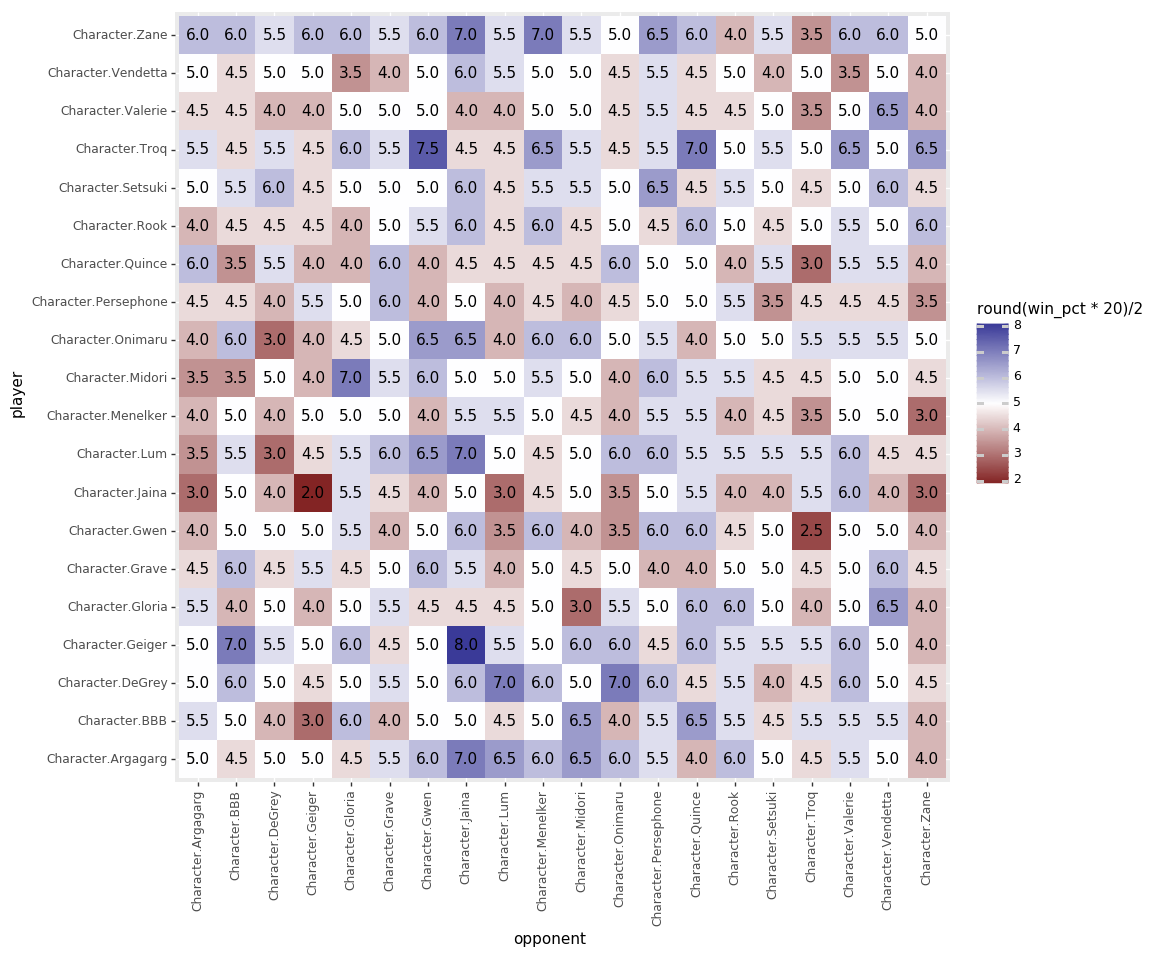

<ggplot: (-9223363242588219802)>

In [58]:
from plotnine import *

(
    ggplot(mu_ci.reset_index(), aes(y='player', x='opponent', fill='round(win_pct * 20)/2'))
    + geom_tile()
    + geom_text(aes(label='round(win_pct * 20)/2'))
    + scale_fill_gradient2(midpoint=5)
    + theme(axis_text_x = element_text(angle = 90), figure_size=(10, 10))
)

/home/cpennington/.pyenv/versions/3.6.1/lib/python3.6/site-packages/mizani/bounds.py:302: RuntimeWarning: invalid value encountered in less
  outside = (x < range[0]) | (x > range[1])
/home/cpennington/.pyenv/versions/3.6.1/lib/python3.6/site-packages/mizani/bounds.py:302: RuntimeWarning: invalid value encountered in greater
  outside = (x < range[0]) | (x > range[1])
/home/cpennington/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


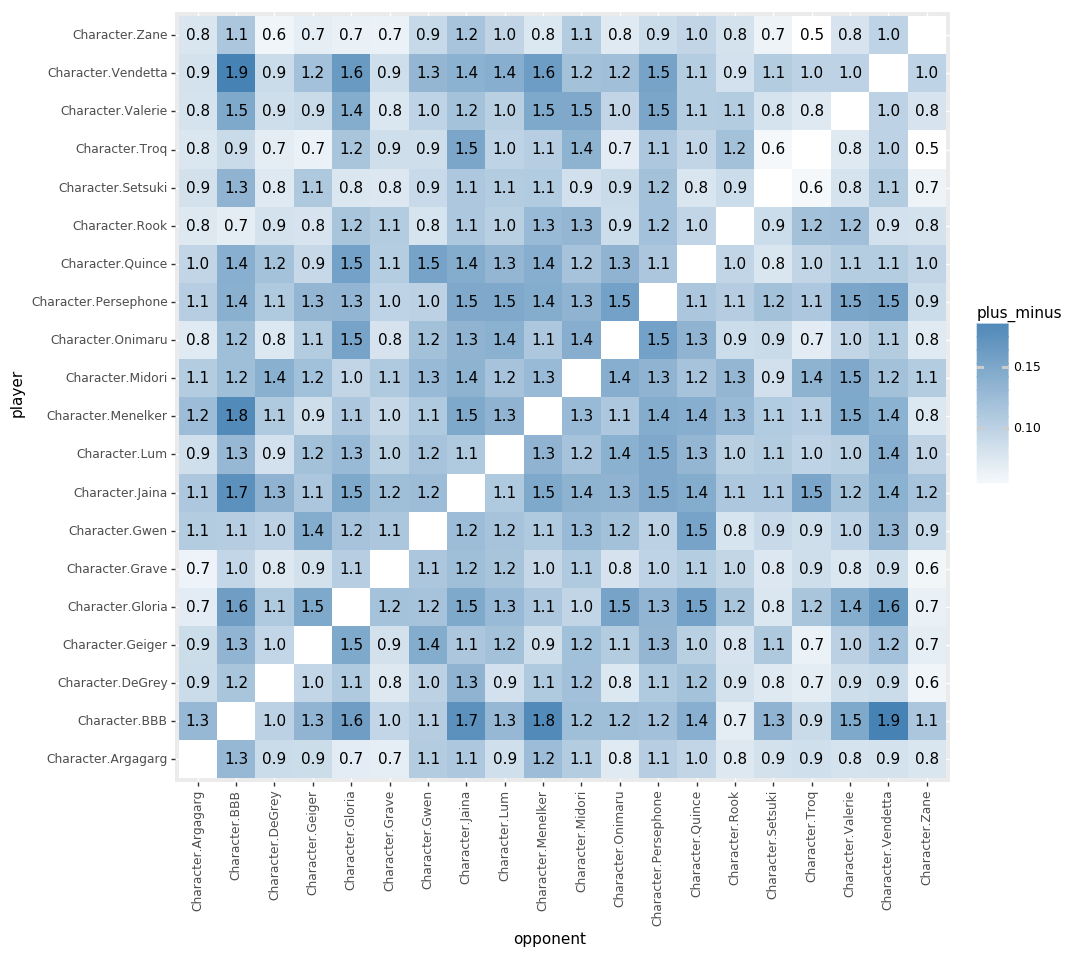

<ggplot: (-9223363242590742510)>

In [16]:
from plotnine import *

(
    ggplot(mu_ci.reset_index(), aes(y='player', x='opponent', fill='plus_minus'))
    + geom_tile(na_rm=True)
    + geom_text(aes(label='round(plus_minus*100)/10'), na_rm=True)
    + theme(axis_text_x = element_text(angle = 90), figure_size=(10, 10))
    + scale_fill_gradient(low='white', high='steelblue')
)

In [17]:
for year, games in [('All', historical_games)] + sorted(historical_games.groupby('match_year')):
    print(year)
    print("20XX")
    print(Meta(games).matchup_influence(4, 4).sort_values(ascending=False))
    print("19XX")
    print(Meta(games, exclude=[Character.Zane, Character.DeGrey, Character.Geiger, Character.Troq]).matchup_influence(4, 4).sort_values(ascending=False))

All
20XX
Character.Zane          0.474869
Character.DeGrey        0.463713
Character.Argagarg      0.457617
Character.Troq          0.420014
Character.Geiger        0.407529
Character.Setsuki       0.370591
Character.Grave         0.349757
Character.BBB           0.277521
Character.Gwen          0.254102
Character.Lum           0.253632
Character.Rook          0.251092
Character.Onimaru       0.247283
Character.Gloria        0.235222
Character.Valerie       0.227601
Character.Quince        0.211694
Character.Menelker      0.208967
Character.Midori        0.206361
Character.Vendetta      0.185804
Character.Persephone    0.179371
Character.Jaina         0.154753
dtype: float64
19XX
Character.Argagarg      0.702062
Character.Setsuki       0.515520
Character.Grave         0.480018
Character.Lum           0.379721
Character.Gwen          0.364017
Character.Gloria        0.363194
Character.BBB           0.351631
Character.Rook          0.349200
Character.Onimaru       0.335860
Character.Quin

In [18]:
meta = Meta(historical_games)
meta.pairings().sort_values('similarity', ascending=False)

maxes  similarity
Character.Jaina      Character.Zane        11.593039    0.838484
Character.Argagarg   Character.Jaina       11.158821    0.765695
Character.Jaina      Character.Troq        11.160674    0.735063
Character.DeGrey     Character.Jaina       10.901232    0.719499
Character.Geiger     Character.Jaina       11.147786    0.713960
                     Character.Valerie     11.368619    0.679559
                     Character.Quince      11.402464    0.666867
Character.Persephone Character.Troq        11.254005    0.660399
                     Character.Zane        11.607901    0.656857
Character.Geiger     Character.Gloria      11.413223    0.643563
Character.Jaina      Character.Quince      10.227737    0.640786
Character.Troq       Character.Vendetta    11.361374    0.639922
Character.Jaina      Character.Vendetta    10.206805    0.638923
Character.Geiger     Character.Persephone  11.278637    0.633380
Character.Jaina      Character.Setsuki     10.767419    0.629339
Character.Menelker   Character.Troq        11.342019    0.627902
Character.Grave      Character.Jaina       10.438791    0.627564
Character.Argagarg   Character.Gwen        11.110241    0.627045
Character.Gloria     Character.Jaina       10.338284    0.626163
Character.Jaina      Character.Lum         10.673690    0.625286
Character.Onimaru    Character.Quince      10.984955    0.618762
Character.Quince     Character.Troq        11.350953    0.616901
Character.Geiger     Character.Troq        12.043026    0.614306
Character.Lum        Character.Quince      11.064728    0.613951
Character.Argagarg   Character.Troq        11.914982    0.610875
Character.Geiger     Character.Gwen        11.282038    0.606235
Character.Valerie    Character.Zane        11.453450    0.602205
Character.Gloria     Character.Zane        11.631134    0.601861
Character.Quince     Character.Zane        11.534139    0.598301
Character.Jaina      Character.Onimaru     10.563874    0.588614
...                                              ...         ...
Character.Grave      Character.Vendetta    10.459759    0.398228
Character.Gloria     Character.Setsuki     10.730077    0.397665
Character.Argagarg   Character.Setsuki     11.265913    0.396792
Character.Gwen       Character.Rook        10.321851    0.396207
Character.BBB        Character.Midori      10.733165    0.394105
Character.Midori     Character.Valerie     10.337432    0.391499
Character.Setsuki    Character.Valerie     10.473086    0.390631
Character.Menelker   Character.Setsuki     10.606033    0.390401
Character.Rook       Character.Setsuki     10.876169    0.390372
Character.Grave      Character.Persephone  10.163952    0.389867
Character.Midori     Character.Setsuki     10.912748    0.389623
Character.Setsuki    Character.Zane        11.625554    0.383865
Character.Onimaru    Character.Rook        10.689362    0.382795
Character.Grave      Character.Valerie     10.250982    0.380116
Character.Persephone Character.Valerie      9.877633    0.377055
Character.DeGrey     Character.Setsuki     11.067150    0.375437
Character.Rook       Character.Vendetta    10.370354    0.374516
Character.Setsuki    Character.Vendetta    10.671882    0.368692
Character.Quince     Character.Valerie     10.066895    0.367864
Character.Menelker   Character.Vendetta    10.086293    0.357855
Character.Grave      Character.Setsuki     10.669081    0.356390
                     Character.Rook        10.508791    0.351054
Character.Menelker   Character.Valerie      9.903422    0.347798
Character.Lum        Character.Onimaru     10.982058    0.342654
Character.Gloria     Character.Valerie     10.040218    0.340783
Character.Gwen       Character.Menelker     9.913732    0.339380
Character.Menelker   Character.Persephone   9.853024    0.325143
Character.Gloria     Character.Quince      10.172839    0.324510
Character.Argagarg   Character.DeGrey      11.216115    0.323977
Character.Grave      Character.Onimaru     10.550986    0.322496

[190 rows x 2 co

In [19]:
Meta(historical_games).counterpick_counts.loc[Character.Argagarg]

character_2
Character.Argagarg       9.0
Character.BBB            5.0
Character.DeGrey        21.0
Character.Geiger        34.0
Character.Gloria        53.0
Character.Grave         16.0
Character.Gwen          12.0
Character.Jaina         13.0
Character.Lum           13.0
Character.Menelker      12.0
Character.Midori        25.0
Character.Onimaru        8.0
Character.Persephone    36.0
Character.Quince        18.0
Character.Rook          42.0
Character.Setsuki       28.0
Character.Troq          55.0
Character.Valerie       21.0
Character.Vendetta      25.0
Character.Zane          37.0
dtype: float64

In [20]:
from numpy.linalg import norm

meta = Meta(historical_games, [])
inf = meta.matchup_influence(4, 4)
norm_inf = inf / inf.sum()
print(norm(norm_inf - pandas.Series(data=1/(len(inf)), index=inf.index), ord=2))

print("Expected wins")
for char, wins in inf.sort_values(ascending=False).iteritems():
    print(f"1. {char}: {wins:.3}")
print("Percent wins")
for char, pct in (norm_inf * 100).sort_values(ascending=False).iteritems():
    print(f"1. {char}: {pct:.3}")

0.0779852405521
Expected wins
1. Character.Zane: 0.475
1. Character.DeGrey: 0.464
1. Character.Argagarg: 0.458
1. Character.Troq: 0.42
1. Character.Geiger: 0.408
1. Character.Setsuki: 0.371
1. Character.Grave: 0.35
1. Character.BBB: 0.278
1. Character.Gwen: 0.254
1. Character.Lum: 0.254
1. Character.Rook: 0.251
1. Character.Onimaru: 0.247
1. Character.Gloria: 0.235
1. Character.Valerie: 0.228
1. Character.Quince: 0.212
1. Character.Menelker: 0.209
1. Character.Midori: 0.206
1. Character.Vendetta: 0.186
1. Character.Persephone: 0.179
1. Character.Jaina: 0.155
Percent wins
1. Character.Zane: 8.13
1. Character.DeGrey: 7.94
1. Character.Argagarg: 7.84
1. Character.Troq: 7.2
1. Character.Geiger: 6.98
1. Character.Setsuki: 6.35
1. Character.Grave: 5.99
1. Character.BBB: 4.75
1. Character.Gwen: 4.35
1. Character.Lum: 4.34
1. Character.Rook: 4.3
1. Character.Onimaru: 4.24
1. Character.Gloria: 4.03
1. Character.Valerie: 3.9
1. Character.Quince: 3.63
1. Character.Menelker: 3.58
1. Character.Mido